# Importando bibliotecas, lendo apenas as colunas necessárias e imprimindo apenas cinco linhas com a função .head()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/home/mauro/Área de Trabalho/enade/microdados_enade_2005/2.DADOS/microdados_enade_2005.csv", delimiter=';', encoding='iso-8859-1', usecols=['nu_ano', 'co_grupo', 'tp_sexo'])
df.head()

,nu_ano,co_grupo,tp_sexo
0,2005,7,1
1,2005,7,1
2,2005,7,2
3,2005,7,1
4,2005,7,2


**Distribuição dos alunos por curso no enem em um universo de todos os cursos**

Text(0, 0.5, 'Alunos')

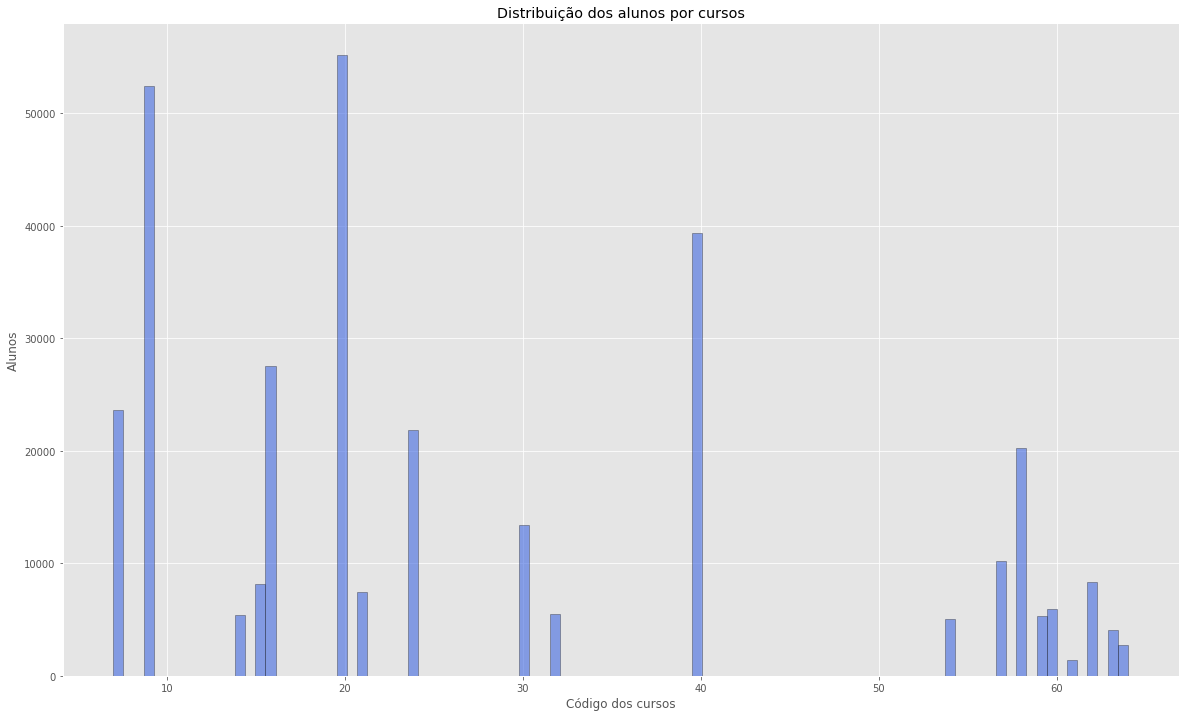

In [2]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["co_grupo"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição dos alunos por cursos")
plt.xlabel("Código dos cursos")
plt.ylabel("Alunos")

**Usando a função loc para selecionar a coluna que contém os dados desejados e a função assign para criar uma nova coluna de nome curso.**

In [3]:
df = pd.read_csv("/home/mauro/Área de Trabalho/enade/microdados_enade_2005/2.DADOS/microdados_enade_2005.csv", delimiter=';', encoding='iso-8859-1', usecols=['nu_ano','co_grupo','tp_sexo'])
df = df.loc[(df['co_grupo']==40)].assign(curso=df.co_grupo)
df.head()

,nu_ano,co_grupo,tp_sexo,curso
220589,2005,40,1,40
220590,2005,40,1,40
220591,2005,40,1,40
220592,2005,40,1,40
220593,2005,40,1,40


**Criando a função define_nome para converter o código do curso em nome do curso.**

In [4]:
def define_nome(num):
    if num == 40:
        return 'Computação'
df['curso'] = df['co_grupo'].map(define_nome)
df.head()

,nu_ano,co_grupo,tp_sexo,curso
220589,2005,40,1,Computação
220590,2005,40,1,Computação
220591,2005,40,1,Computação
220592,2005,40,1,Computação
220593,2005,40,1,Computação


**Usando loc para selecionar as linhas de interesse dentro da coluna de códigos dos cursos e value_counts para contar o número total de alunos.**

In [5]:
dfTotal = df.loc[(df['co_grupo']==40)]
dfTotal['co_grupo'].value_counts()

40    39374
Name: co_grupo, dtype: int64

**Contando o número de alunos e alunas na coluna de gênero sexual. São 32.079 alunos e 7.295 alunas**

In [6]:
dfAlunos = df.loc[(df['co_grupo']==40)]
dfAlunos['tp_sexo'].value_counts()

1    32079
2     7295
Name: tp_sexo, dtype: int64

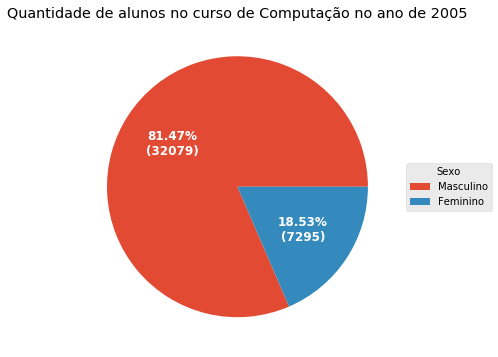

In [7]:
# Aqui criamos a área que plotamos o gráfico e definimos seu tamanho
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect='equal'))
# Criando nosso conjunto de dados
sexo = ['Masculino', 'Feminino']
quant = [32079, 7295] 


# Aqui serão colocados os alunos e as porcentagens no gráfico
def func(pct, allvals):
    # calc %
    absolute = int(round(pct/100.*np.sum(allvals)))
    # fazendo legenda do gráfico com % e Nº de Alunos
    return "{:.2f}%\n({:d})".format(pct, absolute)
    
# Criando o gráfico e colocando a função da legenda interna 
wedges, texts, autotexts = ax.pie(quant, autopct=lambda pct: func(pct, quant),
                                  textprops=dict(color="w"))

# Definindo a caixa de legenda externa, título, localização e onde vai aparecer
ax.legend(wedges, sexo,
          title="Sexo",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=12, weight="bold")

# Título do gráfico
ax.set_title("Quantidade de alunos no curso de Computação no ano de 2005")

# Mostrando o gráfico
plt.show()

# Legendas:
### Coluna sexo
**1** : Masculino<br>
**2** : Feminino
### Coluna Curso
**40** - Computação